In [12]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
# Load the Abalone dataset
def load_abalone_dataset(url):
    import pandas as pd
    columns = [
        "Sex", "Length", "Diameter", "Height", "WholeWeight",
        "ShuckedWeight", "VisceraWeight", "ShellWeight", "Rings"
    ]
    data = pd.read_csv(url, header=None, names=columns)
    # One-hot encoding for 'Sex' column
    data = pd.get_dummies(data, columns=["Sex"], drop_first=True)
    X = data.drop("Rings", axis=1).values
    y = data["Rings"].values
    return X, y

In [14]:
# Euclidean Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [15]:
# KNN Class
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [16]:
# Metrics Calculation
def calculate_metrics(y_true, y_pred):
    classes = np.unique(y_true)
    precision, recall, fscore = [], [], []

    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))
        fp = np.sum((y_pred == cls) & (y_true != cls))
        fn = np.sum((y_pred != cls) & (y_true == cls))

        prec = tp / (tp + fp) if tp + fp > 0 else 0
        rec = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * (prec * rec) / (prec + rec) if prec + rec > 0 else 0

        precision.append(prec)
        recall.append(rec)
        fscore.append(f1)

    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy, np.mean(precision), np.mean(recall), np.mean(fscore)

In [17]:
# Plotting Function
def plot_accuracy_vs_k(k_values, train_accuracies, test_accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, train_accuracies, label="Training Accuracy", marker="o")
    plt.plot(k_values, test_accuracies, label="Testing Accuracy", marker="o")
    plt.xlabel("K Values")
    plt.ylabel("Accuracy")
    plt.title("KNN: Accuracy vs K")
    plt.legend()
    plt.grid()
    plt.show()

Best K: 18
Training Metrics (Accuracy, Precision, Recall, F-Score): (0.39753677728361275, 0.27860421016449216, 0.17736152388593873, 0.1842030523991263)
Testing Metrics (Accuracy, Precision, Recall, F-Score): (0.27910685805422647, 0.16007359296130708, 0.1545118643237467, 0.14813686587752897)


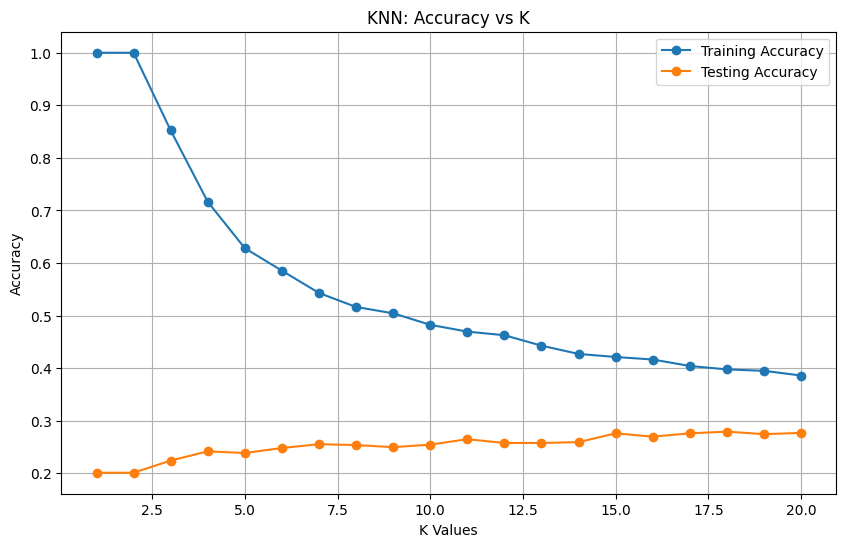

In [19]:
# Main Execution
if __name__ == "__main__":
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
    X, y = load_abalone_dataset(url)

    # Splitting the data into training and testing sets using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Tuning K and evaluating performance
    k_values = range(1, 21)
    train_accuracies, test_accuracies = [], []

    for k in k_values:
        clf = KNN(k=k)
        clf.fit(X_train, y_train)

        train_preds = clf.predict(X_train)
        test_preds = clf.predict(X_test)

        train_acc, _, _, _ = calculate_metrics(y_train, train_preds)
        test_acc, _, _, _ = calculate_metrics(y_test, test_preds)

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

    # Find the best K
    best_k = k_values[np.argmax(test_accuracies)]
    print(f"Best K: {best_k}")

    # Final Evaluation with Best K
    clf = KNN(k=best_k)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    print(f"Training Metrics (Accuracy, Precision, Recall, F-Score): {train_metrics}")
    print(f"Testing Metrics (Accuracy, Precision, Recall, F-Score): {test_metrics}")

    # Plot the accuracy vs K graph
    plot_accuracy_vs_k(k_values, train_accuracies, test_accuracies)